## 2.构建 delayed $\gamma-\gamma$ matrix

In [1]:
TString sinfile="d46_123.root";
TString soutfile="d46_123gg.root";
TFile *fin = new TFile(sinfile);
TTree *tree=(TTree*) fin->Get("tree");

In [2]:
TCanvas *c1=new TCanvas("c1","c1");
TH2D *h0a,*h1a,*h2a;
gStyle->SetPalette(1);

In [3]:
tree->Draw("dt0:dt1-dt0>>h0(100,0,1000,50,0,500)","chit01>0","colz");
tree->Draw("dt0:dt1-dt0-3000>>h1(100,0,1000,50,0,500)","chit01>0","colz");
h0a=(TH2D*)gROOT->FindObject("h0");
h1a=(TH2D*)gROOT->FindObject("h1");
h2a=(TH2D*)h0a->Clone("h2");
h2a->Add(h0a,h1a,1,-1);

## mother-daughter lifetime correlations

### dt1-dt0<1000

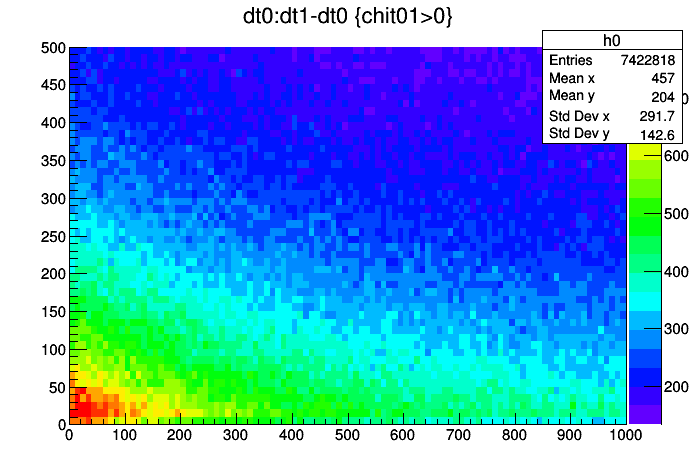

In [4]:
h0a->Draw("colz");
c1->Draw();

### 3000<dt1-dt0<4000

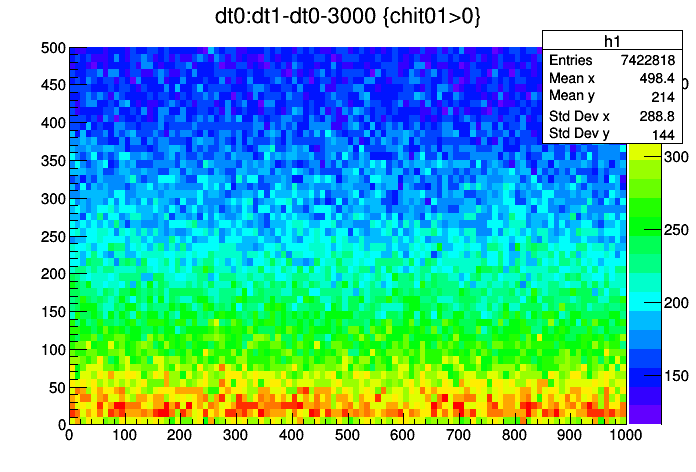

In [5]:
h1a->Draw("colz");
c1->Draw();

### 减本底-短时间和长时间关联谱相减
- 孙子核的长时间本底有明显的抑制

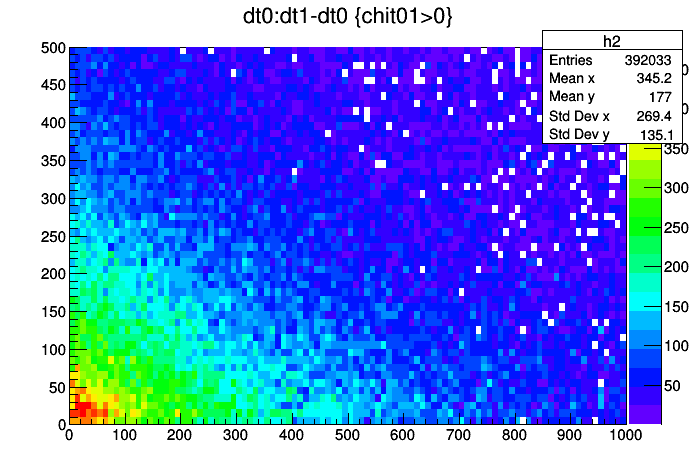

In [6]:
h2a->SetAxisRange(0.1,h2a->GetMaximum(),"Z");//去掉Z轴负值
h2a->Draw("colz");
c1->Draw();

In [7]:
//for 123Ag,129Cd
TString scut0="dt0<300&&dt1-dt0<400";//cut from 2D gg.
TString scut1="dt0<300&&dt1-dt0>3000&&dt1-dt0<3400";//cut from 2D gg.
Int_t nxbin=2000;
Float_t xmin=0.;
Float_t xmax=2000;

In [8]:
TH1F *hg2x, *hg2y;//total projection
TH1F *hg2xb, *hg2yb;//background
TH1F *hg2xp, *hg2yp;//net peaks
TH2F *hg2xy,*hg2xyb, *hg2xyp;// two-fold matrix

In [9]:
tree->Draw(Form("cde0:cde1>>hg2xy(%d,%f,%f,%d,%f,%f)",nxbin,xmin,xmax,nxbin,xmin,xmax),scut0,"colz");
tree->Draw(Form("cde0:cde1>>hg2xy1(%d,%f,%f,%d,%f,%f)",nxbin,xmin,xmax,nxbin,xmin,xmax),scut1,"colz");
hg2xy=(TH2F*)gROOT->FindObject("hg2xy");
hg2xy1=(TH2F*)gROOT->FindObject("hg2xy1");
hg2xy->SetTitle("g-g matrix for delayed coincidence");
hg2xy->Add(hg2xy,hg2xy1,1,-1);
hg2x=(TH1F*)hg2xy->ProjectionX("hg2x");
hg2y=(TH1F*)hg2xy->ProjectionY("hg2y");

In [10]:
TSpectrum *sx= new TSpectrum(500);
TSpectrum *sy= new TSpectrum(500);

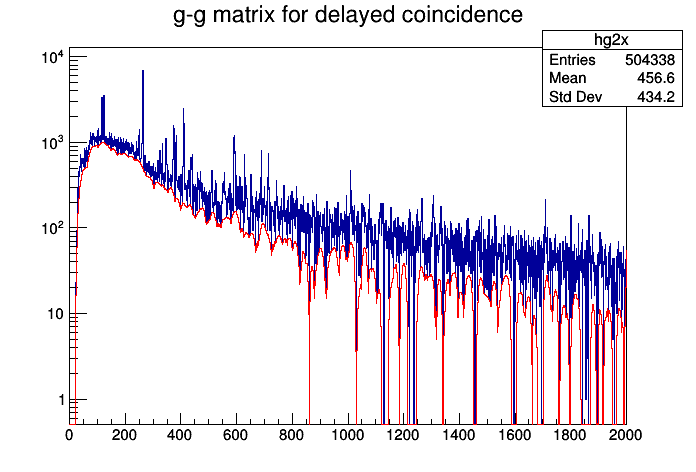

In [11]:
hg2x->Draw();
hg2xb=(TH1F*)sx->Background(hg2x,8,"nosmoothing same");//8 for pd125,
hg2xb->SetName("hg2xb");
hg2xb->SetTitle("background from decay of daughter nuclei");
hg2xp=(TH1F*)hg2xb->Clone("hg2xp");
hg2xp->Add(hg2x,hg2xb,1,-1);
hg2xp->SetTitle("ge-net peaks from decay of daughter nuclei");
c1->SetLogy();
c1->Draw();

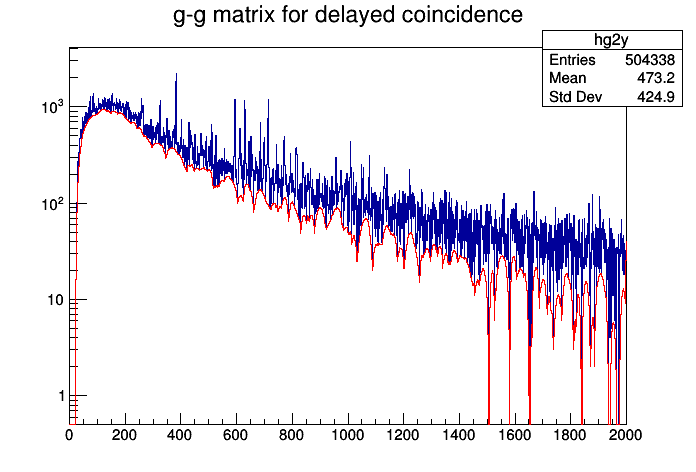

In [12]:
hg2y->Draw();
hg2yb=(TH1F*)sy->Background(hg2y,8,"nosmoothing same");//8 for pd125,
hg2yb->SetName("hg2yb");
hg2yb->SetTitle("background from decay of mother nuclei");
hg2yp=(TH1F*)hg2yb->Clone("hg2yp");
hg2yp->Add(hg2y,hg2yb,1,-1);
hg2yp->SetTitle("ae-net peaks from decay of mother nuclei");
c1->SetLogy();
c1->Draw();

In [13]:
.L peaks.C

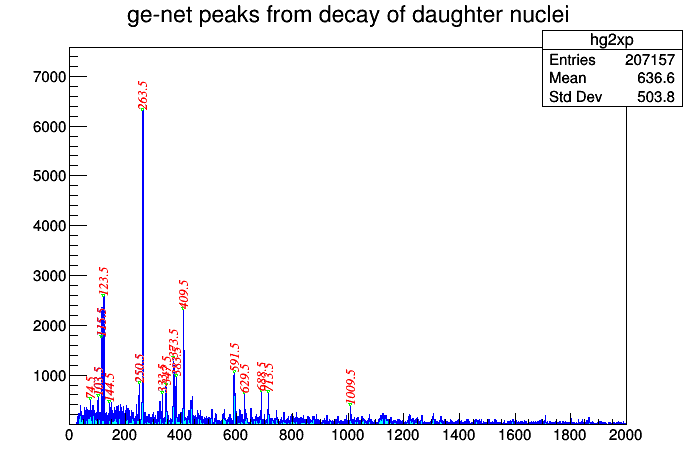

In [14]:
peaks("hg2xp");
hg2xp->GetXaxis()->SetRangeUser(0,1000);
c1->SetLogy(0);
c1->Draw();
hg2xp->GetXaxis()->SetRangeUser(xmin,xmax);

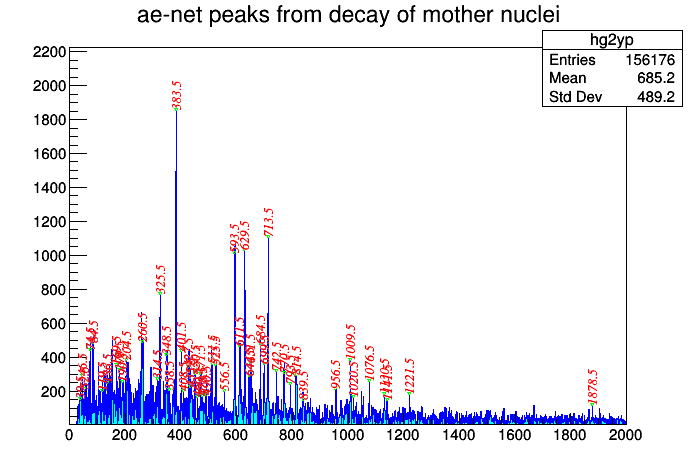

In [15]:
peaks("hg2yp");
hg2yp->GetXaxis()->SetRangeUser(0,1000);
c1->SetLogy(0);
c1->Draw();
hg2yp->GetXaxis()->SetRangeUser(xmin,xmax);

In [16]:
hg2xyb=new TH2F("hg2xyb","g-g background matrix for delayed coincidence",nxbin,xmin,xmax,nxbin,xmin,xmax);
hg2xyb->Reset();
Float_t T, pi, pj, bi, bj, Bij, x, y;
T=hg2x->Integral();
for(int i=0;i<hg2xy->GetNbinsX();i++) {
    for(int j=0;j<hg2xy->GetNbinsY();j++) {
      pi=hg2x->GetBinContent(i+1);
      pj=hg2y->GetBinContent(j+1);
      bi=hg2xb->GetBinContent(i+1);
      bj=hg2yb->GetBinContent(j+1);
      Bij=(bi*pj+bi*bj)/T;//asymetric matix
      x=hg2x->GetBinCenter(i+1);
      y=hg2y->GetBinCenter(j+1);
      hg2xyb->Fill(x,y,Bij);
    }
 }

In [17]:
hg2xyp=new TH2F("hg2xyp","g-g matrix for delayed coincidence background subtracted",nxbin,xmin,xmax,nxbin,xmin,xmax);
hg2xyp->Add(hg2xy,hg2xyb,1,-1);
TFile *fout=new TFile(soutfile,"RECREATE");
hg2xy->Write();
hg2xyb->Write();
hg2xyp->Write();
hg2x->Write();
hg2xb->Write();
hg2xp->Write();
hg2y->Write();
hg2yb->Write();
hg2yp->Write();
fout->Write();
fout->Close(); 
cout<<"Done!"<<endl;